In [1]:
!pip install mlxtend

In [2]:
#Importing libraries
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [13]:
online = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011", parse_dates=['InvoiceDate'])
online = online.sort_values(by='InvoiceDate')
online = online.set_index('InvoiceDate')

In [14]:
online.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541910 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   Price        541910 non-null  float64
 5   Customer ID  406830 non-null  float64
 6   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [17]:
online.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom


In [18]:
 online.tail()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country
InvoiceDate,,,,,,,
2011-12-09 12:50:00,581587,22555,PLASTERS IN TIN STRONGMAN,12,1.65,12680.0,France
2011-12-09 12:50:00,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,1.65,12680.0,France
2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France
2011-12-09 12:50:00,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,3.75,12680.0,France
2011-12-09 12:50:00,581587,POST,POSTAGE,1,18.00,12680.0,France


In [19]:
online.describe()

,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
online.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [21]:
online['Description'].fillna(0, inplace = True)
online['Customer ID'].fillna(0, inplace = True)
online.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
Price          0
Customer ID    0
Country        0
dtype: int64

In [22]:
online['selled'] = 1
pivot = online.pivot_table(values="selled",index="Invoice",columns="Description").fillna(0)
print('Pivot Table Shape :',pivot.shape)
print(pivot.info())
pivot.head()

Pivot Table Shape : (25900, 4224)
<class 'pandas.core.frame.DataFrame'>
Index: 25900 entries, 536365 to C581569
Columns: 4224 entries, 0 to wrongly sold sets
dtypes: float64(4224)
memory usage: 834.9+ MB
None


Description,0,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
Invoice,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
freq_sets = apriori(pivot,min_support=0.02,use_colnames=True).sort_values(by='support',ascending=False)
freq_sets

C:\Users\HP\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
174,0.088880,(WHITE HANGING HEART T-LIGHT HOLDER)
136,0.083745,(REGENCY CAKESTAND 3 TIER)
71,0.082432,(JUMBO BAG RED RETROSPOT)
110,0.065869,(PARTY BUNTING)
91,0.062046,(LUNCH BAG RED RETROSPOT)
...,...,...
194,0.020000,"(JUMBO STORAGE BAG SUKI, JUMBO BAG PINK POLKADOT)"
205,0.020000,"(LUNCH BAG SUKI DESIGN , LUNCH BAG BLACK SKULL.)"
189,0.020000,"(GREEN REGENCY TEACUP AND SAUCER, REGENCY CAKE..."
66,0.020000,(JUMBO BAG DOILEY PATTERNS)


In [25]:
Rules = association_rules(freq_sets,metric='lift',min_threshold=1).sort_values(by='lift',ascending=False)
Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.030270,0.030927,0.021197,0.700255,22.642456,0.020261,3.232994
37,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.030927,0.030270,0.021197,0.685393,22.642456,0.020261,3.082355
38,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.040811,0.023707,0.021197,0.519395,21.909313,0.020229,2.031382
35,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.023707,0.040811,0.021197,0.894137,21.909313,0.020229,9.060649
32,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.029537,0.035676,0.021197,0.717647,20.115865,0.020143,3.415315
...,...,...,...,...,...,...,...,...,...
67,(REGENCY CAKESTAND 3 TIER),(GREEN REGENCY TEACUP AND SAUCER),0.083745,0.040811,0.020000,0.238820,5.851874,0.016582,1.260134
51,(ROSES REGENCY TEACUP AND SAUCER ),(REGENCY CAKESTAND 3 TIER),0.043243,0.083745,0.020734,0.479464,5.725277,0.017112,1.760215
50,(REGENCY CAKESTAND 3 TIER),(ROSES REGENCY TEACUP AND SAUCER ),0.083745,0.043243,0.020734,0.247580,5.725277,0.017112,1.271572
20,(JUMBO BAG RED RETROSPOT),(LUNCH BAG RED RETROSPOT),0.082432,0.062046,0.022703,0.275410,4.438777,0.017588,1.294461


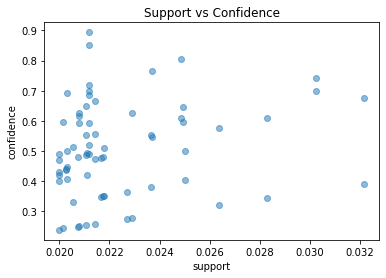

In [26]:
plt.scatter(Rules['support'], Rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

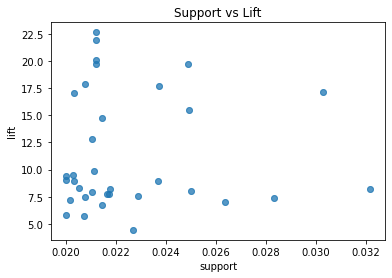

In [27]:
plt.scatter(Rules['support'], Rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

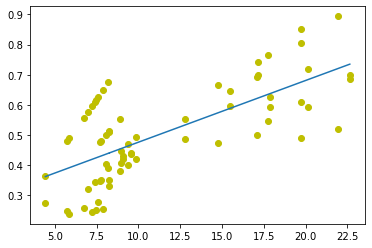

In [28]:
fit = np.polyfit(Rules['lift'], Rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(Rules['lift'], Rules['confidence'], 'yo', Rules['lift'], fit_fn(Rules['lift']))